In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Make sure the csv file is in your Google Drive (main folder) or change the line below
data_dir="/content/drive/MyDrive/House_prediction.csv"

df=pd.read_csv(data_dir)
print(df.head())

gk = df.groupby('city')
list_of_cities=df['city']

list_of_cities = list(set(list_of_cities))

# gk.get_group('Campinas')
list_of_cities

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

['Campinas', 'Porto Alegre', 'São Paulo', 'Belo Horizonte', 'Rio de Janeiro']

<class 'pandas.core.series.Series'>


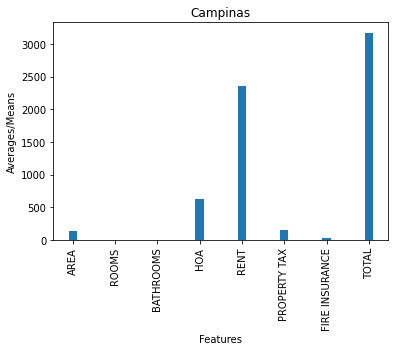

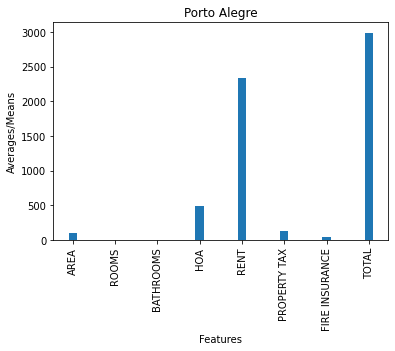

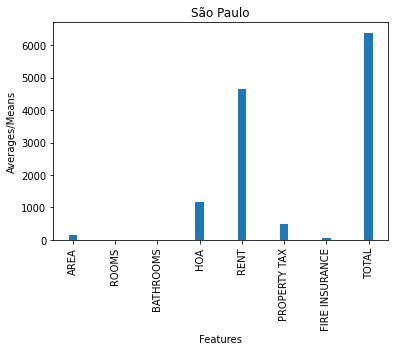

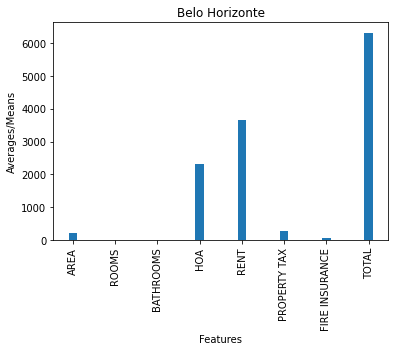

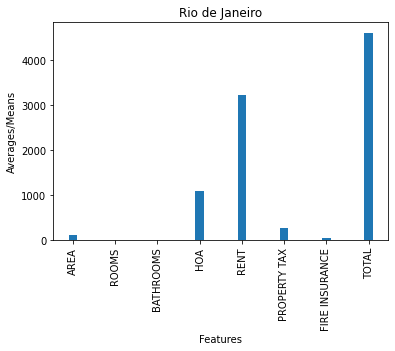

In [3]:
# print(gk.get_group(list_of_cities[0]))
t=gk.get_group(list_of_cities[0]) 
print(type(t['hoa (R$)']))

for city in list_of_cities:
  tdf=gk.get_group(city)
  area=tdf.area 
  area=area.tolist()
  x=[]
  y=[]
  x.append("AREA")
  y.append(mean(area))
  rooms=tdf.rooms
  rooms=rooms.tolist()
  x.append("ROOMS")
  y.append(mean(rooms))
  brooms=tdf.bathroom
  brooms=brooms.tolist()
  x.append("BATHROOMS")
  y.append(mean(brooms))
  hoa=tdf['hoa (R$)']
  hoa=hoa.tolist()
  x.append("HOA")
  y.append(mean(hoa))
  rent=tdf['rent amount (R$)']
  rent=rent.tolist()
  x.append("RENT")
  y.append(mean(rent))
  ptax=tdf['property tax (R$)']
  ptax=ptax.tolist()
  x.append("PROPERTY TAX")
  y.append(mean(ptax))
  fi=tdf['fire insurance (R$)']
  fi=fi.tolist()
  x.append("FIRE INSURANCE")
  y.append(mean(fi))
  tot=tdf['total (R$)']
  tot=tot.tolist()
  x.append("TOTAL")
  y.append(mean(tot))
  
  plt.bar(x, y,
          width = 0.2)
  plt.xticks(rotation=90)
  plt.xlabel("Features")
  plt.ylabel("Averages/Means")
  plt.title(city)
  plt.show()

  


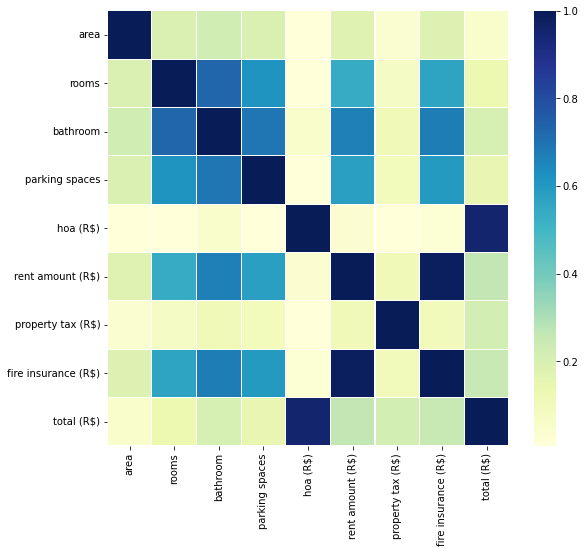

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

From the correlation matrix, it can be seen that the dark areas (except the diagonals) are related closely.   
For example:   
`hoa` and `total (R$)`  
`rent amount (R$)` and `fire insurance (R$)`  
